CNN custom Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1634 files belonging to 4 classes.
Using 1308 files for training.
Found 1634 files belonging to 4 classes.
Using 326 files for validation.
Found 362 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1016064)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    65,028,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,047,812 (248.14 MB)

 Trainable params: 65,047,812 (248.14 MB)

 Non-trainable params: 0 (0.00 B)


Model 25 epoch boyunca eğitiliyor...
Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - accuracy: 0.7841 - loss: 2.3717 - val_accuracy: 0.9908 - val_loss: 0.0885
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9907 - loss: 0.0486 - val_accuracy: 0.9969 - val_loss: 0.0181
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9953 - loss: 0.0131 - val_accuracy: 0.9877 - val_loss: 0.0463
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9835 - loss: 0.0544 - val_accuracy: 0.9939 - val_loss: 0.0571
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9973 - loss: 0.0112 - val_accuracy: 0.9969 - val_loss: 0.0225
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9960 - loss: 0.0091 - val_accuracy: 0.9969 - val_loss: 0.0107
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9969 - val_loss: 0.0136
Epoch 8/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 1.0000 -

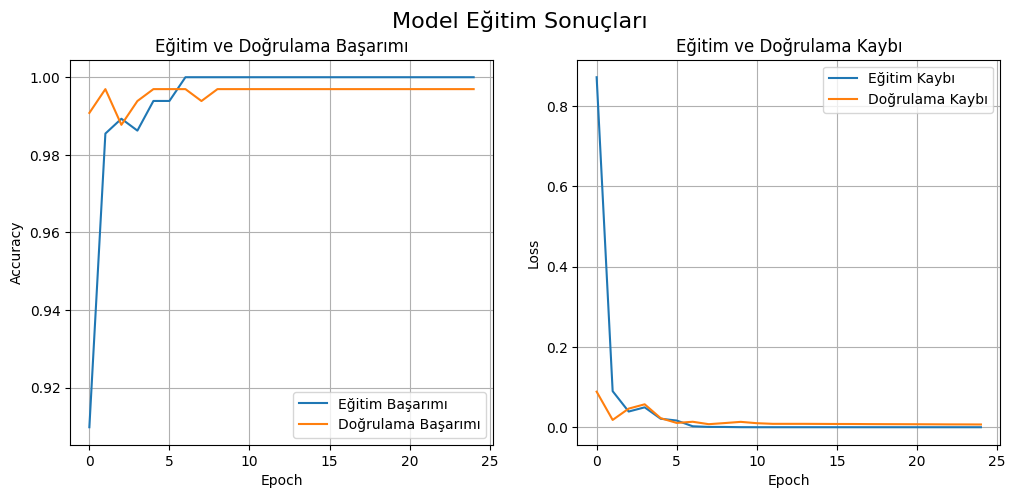

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Train"

test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Test"


# Reduce image size and batch size
IMG_SIZE = (512, 512)
BATCH_SIZE = 16
EPOCHS = 25

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# --- Test Veri Setini Oluşturma ---
test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")


AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- SİZİN ORİJİNAL CNN MODELİNİZİ OLUŞTURMA ---
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])


# --- Model Derleme ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- Model Eğitimi ---
print(f"\nModel {EPOCHS} epoch boyunca eğitiliyor...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("\nEğitim tamamlandı.")

# --- Modelin Test Verisi Üzerinde Değerlendirilmesi ---
print("\nModel test verisi üzerinde değerlendiriliyor...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Verisi Kayıp (Loss): {test_loss}")
print(f"Test Verisi Başarım (Accuracy): {test_accuracy}")


# --- Grafik Çizdirme ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Model Eğitim Sonuçları', fontsize=16)
plt.show()

# efficeint Model


Mounted at /content/drive
Veri setleri yükleniyor...
Found 1634 files belonging to 4 classes.
Using 1308 files for training.
Found 1634 files belonging to 4 classes.
Using 326 files for validation.
Found 362 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Model Özeti (İlk Aşama) ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- İlk Eğitim Aşaması (10 Epoch) Başlıyor ---
Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 311ms/step - accuracy: 0.6546 - loss: 0.8706 - val_accuracy: 0.9908 - val_loss: 0.2209
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9771 - loss: 0.2205 - val_accuracy: 0.9908 - val_loss: 0.1158
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9893 - loss: 0.1190 - val_accuracy: 0.9908 - val_loss: 0.0780
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9872 - loss: 0.0940 - val_accuracy: 0.9908 - val_loss: 0.0618
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9862 - loss: 0.0766 - val_accuracy: 0.9908 - val_loss: 0.0452
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9934 - loss: 0.0500 - val_accuracy: 0.9908 - val_loss: 0.0359
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.9955 - loss: 0.0431 - val_accuracy: 0.9908 - val_loss: 0.0322
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/s

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 1,501,284 (5.73 MB)

 Non-trainable params: 2,553,411 (9.74 MB)

Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.9814 - loss: 0.1831 - val_accuracy: 0.9908 - val_loss: 0.0252
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9884 - loss: 0.1067 - val_accuracy: 0.9908 - val_loss: 0.0263
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.9961 - loss: 0.0661 - val_accuracy: 0.9908 - val_loss: 0.0247
Epoch 13/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9941 - loss: 0.0539 - val_accuracy: 0.9908 - val_loss: 0.0239
Epoch 14/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9901 - loss: 0.0563 - val_accuracy: 0.9908 - val_loss: 0.0215
Epoch 15/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9965 - loss: 0.0348 - val_accuracy: 0.9908 - val_loss: 0.0198
Epoch 16/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9894 - loss: 0.0426 - val_accuracy: 0.9939 - val_loss: 0.0179
Epoch 17/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9942 - loss: 0.0312 - 

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

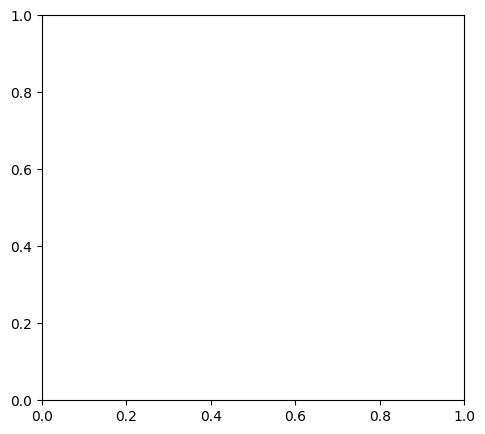

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

from google.colab import drive
drive.mount('/content/drive')

# --- Veri Yolları ---
# Lütfen bu yolların kendi Google Drive'ınızdaki yollarla doğru olduğundan emin olun
train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Test"


# --- Parametreler ---
# Reduce image size and batch size for memory efficiency
IMG_SIZE = (512, 512)
BATCH_SIZE = 16
INITIAL_EPOCHS = 10 # İlk eğitim için epoch sayısı
FINE_TUNE_EPOCHS = 10 # İnce ayar için epoch sayısı
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

# --- Veri Setlerini Yükleme ve Hazırlama ---
print("Veri setleri yükleniyor...")
# Eğitim ve Doğrulama Setleri
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Test Seti
test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

# Veri setlerini performans için optimize etme
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- MODEL OLUŞTURMA ---

# 1. Veri Artırma Katmanları
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

# 2. Model Mimarisi
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# 3. Temel Modeli Dondurma (Feature Extraction için)
base_model.trainable = False

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

# 4. İlk Derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti (İlk Aşama) ---")
model.summary()

# --- AŞAMA 1: ÖZELLİK ÇIKARMA (FEATURE EXTRACTION) EĞİTİMİ ---
print(f"\n--- İlk Eğitim Aşaması ({INITIAL_EPOCHS} Epoch) Başlıyor ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=INITIAL_EPOCHS
)

print("\nİlk eğitim tamamlandı.")
print("İlk eğitim sonrası model test verisi üzerinde değerlendiriliyor...")
loss0, accuracy0 = model.evaluate(test_dataset)
print(f"İlk Eğitim Sonrası Test Başarımı: {accuracy0:.4f}")


# --- AŞAMA 2: İNCE AYAR (FINE-TUNING) ---
print("\n--- İnce Ayar (Fine-Tuning) Aşaması Başlıyor ---")

# 1. Temel modelin üst katmanlarını çöz
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30 # Son 30 katmanı eğitime aç
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 2. Modeli çok düşük öğrenme oranı ile yeniden derle
model.compile(
    optimizer=Adam(learning_rate=1e-5), # 0.00001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti (İnce Ayar Aşaması) ---")
model.summary() # Eğitilebilir parametre sayısının arttığını görün

# 3. Eğitime kaldığı yerden devam et
history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1] # Önceki eğitimin bittiği epoch'tan başla
)

# --- NİHAİ SONUÇLAR ---
print("\nİnce ayar sonrası model test verisi üzerinde değerlendiriliyor...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nİnce Ayar Sonrası Nihai Test Kaybı: {test_loss:.4f}")
print(f"İnce Ayar Sonrası Nihai Test Başarımı: {test_accuracy:.4f}")


# --- GRAFIK ÇIZDIRME (TÜM SÜREÇ) ---
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# Adjust the range for plotting to match the combined history length
epochs_range = range(TOTAL_EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.plot([INITIAL_EPOCHS-1, INITIAL_EPOCHS-1], plt.ylim(), label='İnce Ayar Başlangıcı', linestyle='--')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı (Tüm Süreç)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.plot([INITIAL_EPOCHS-1, INITIAL_EPOCHS-1], plt.ylim(), label='İnce Ayar Başlangıcı', linestyle='--')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı (Tüm Süreç)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Tam Eğitim Süreci Sonuçları', fontsize=16)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri setleri yükleniyor...
Found 1634 files belonging to 4 classes.
Using 1308 files for training.
Found 1634 files belonging to 4 classes.
Using 326 files for validation.
Found 362 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']

--- Model Özeti (İlk Aşama) ---


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- İlk Eğitim Aşaması (25 Epoch) Başlıyor ---
Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.6984 - loss: 0.8180 - val_accuracy: 0.9387 - val_loss: 0.2297
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.9697 - loss: 0.2228 - val_accuracy: 0.9908 - val_loss: 0.1186
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.9893 - loss: 0.1197 - val_accuracy: 0.9908 - val_loss: 0.0833
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9915 - loss: 0.0848 - val_accuracy: 0.9908 - val_loss: 0.0556
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9906 - loss: 0.0694 - val_accuracy: 0.9908 - val_loss: 0.0491
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9933 - loss: 0.0523 - val_accuracy: 0.9908 - val_loss: 0.0389
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9888 - loss: 0.0472 - val_accuracy: 0.9939 - val_loss: 0.0308
Epoch 8/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/s

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 1,501,284 (5.73 MB)

 Non-trainable params: 2,553,411 (9.74 MB)

Epoch 25/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9899 - loss: 0.0935 - val_accuracy: 0.9969 - val_loss: 0.0072
Epoch 26/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9950 - loss: 0.0540 - val_accuracy: 0.9969 - val_loss: 0.0088
Epoch 27/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9957 - loss: 0.0381 - val_accuracy: 0.9969 - val_loss: 0.0090
Epoch 28/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9980 - loss: 0.0285 - val_accuracy: 0.9969 - val_loss: 0.0094
Epoch 29/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9999 - loss: 0.0258 - val_accuracy: 0.9969 - val_loss: 0.0085
Epoch 30/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9986 - loss: 0.0203 - val_accuracy: 0.9969 - val_loss: 0.0079
Epoch 31/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9977 - loss: 0.0202 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 32/35
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.9991 - loss: 0.0175 - 

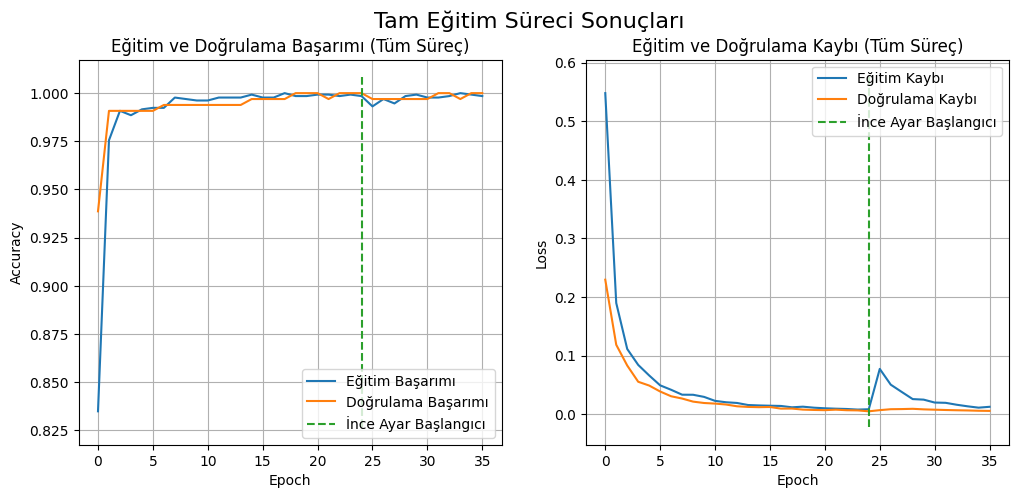

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

from google.colab import drive
drive.mount('/content/drive')

# --- Veri Yolları ---
# Lütfen bu yolların kendi Google Drive'ınızdaki yollarla doğru olduğundan emin olun
train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Test"


# --- Parametreler ---
# Reduce image size and batch size for memory efficiency
IMG_SIZE = (512, 512)
BATCH_SIZE = 16
INITIAL_EPOCHS = 25 # İlk eğitim için epoch sayısı
FINE_TUNE_EPOCHS = 10 # İnce ayar için epoch sayısı
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

# --- Veri Setlerini Yükleme ve Hazırlama ---
print("Veri setleri yükleniyor...")
# Eğitim ve Doğrulama Setleri
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Test Seti
test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

# Veri setlerini performans için optimize etme
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- MODEL OLUŞTURMA ---

# 1. Veri Artırma Katmanları
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

# 2. Model Mimarisi
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# 3. Temel Modeli Dondurma (Feature Extraction için)
base_model.trainable = False

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

# 4. İlk Derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti (İlk Aşama) ---")
model.summary()

# --- AŞAMA 1: ÖZELLİK ÇIKARMA (FEATURE EXTRACTION) EĞİTİMİ ---
print(f"\n--- İlk Eğitim Aşaması ({INITIAL_EPOCHS} Epoch) Başlıyor ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=INITIAL_EPOCHS
)

print("\nİlk eğitim tamamlandı.")
print("İlk eğitim sonrası model test verisi üzerinde değerlendiriliyor...")
loss0, accuracy0 = model.evaluate(test_dataset)
print(f"İlk Eğitim Sonrası Test Başarımı: {accuracy0:.4f}")


# --- AŞAMA 2: İNCE AYAR (FINE-TUNING) ---
print("\n--- İnce Ayar (Fine-Tuning) Aşaması Başlıyor ---")

# 1. Temel modelin üst katmanlarını çöz
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30 # Son 30 katmanı eğitime aç
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 2. Modeli çok düşük öğrenme oranı ile yeniden derle
model.compile(
    optimizer=Adam(learning_rate=1e-5), # 0.00001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti (İnce Ayar Aşaması) ---")
model.summary() # Eğitilebilir parametre sayısının arttığını görün

# 3. Eğitime kaldığı yerden devam et
history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1] # Önceki eğitimin bittiği epoch'tan başla
)

# --- NİHAİ SONUÇLAR ---
print("\nİnce ayar sonrası model test verisi üzerinde değerlendiriliyor...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nİnce Ayar Sonrası Nihai Test Kaybı: {test_loss:.4f}")
print(f"İnce Ayar Sonrası Nihai Test Başarımı: {test_accuracy:.4f}")


# --- GRAFIK ÇIZDIRME (TÜM SÜREÇ) ---
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# Adjust the range for plotting to match the combined history length
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.plot([INITIAL_EPOCHS-1, INITIAL_EPOCHS-1], plt.ylim(), label='İnce Ayar Başlangıcı', linestyle='--')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı (Tüm Süreç)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.plot([INITIAL_EPOCHS-1, INITIAL_EPOCHS-1], plt.ylim(), label='İnce Ayar Başlangıcı', linestyle='--')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı (Tüm Süreç)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Tam Eğitim Süreci Sonuçları', fontsize=16)
plt.show()

# efficient ince ayarsız Model


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1357 files belonging to 3 classes.
Using 1086 files for training.
Found 1357 files belonging to 3 classes.
Using 271 files for validation.
Found 265 files belonging to 3 classes.
Bulunan sınıflar: ['Plank', 'Squat DOWN', 'Squat UP']

--- Model Özeti ---


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- Eğitim Başladı (20 Epoch) ---
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 189ms/step - accuracy: 0.7481 - loss: 0.6575 - val_accuracy: 1.0000 - val_loss: 0.2342
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9701 - loss: 0.1945 - val_accuracy: 1.0000 - val_loss: 0.1253
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9980 - loss: 0.1052 - val_accuracy: 1.0000 - val_loss: 0.0804
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9992 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0582
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0383
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 1.0000 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 1.0000 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 0.0289
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accurac

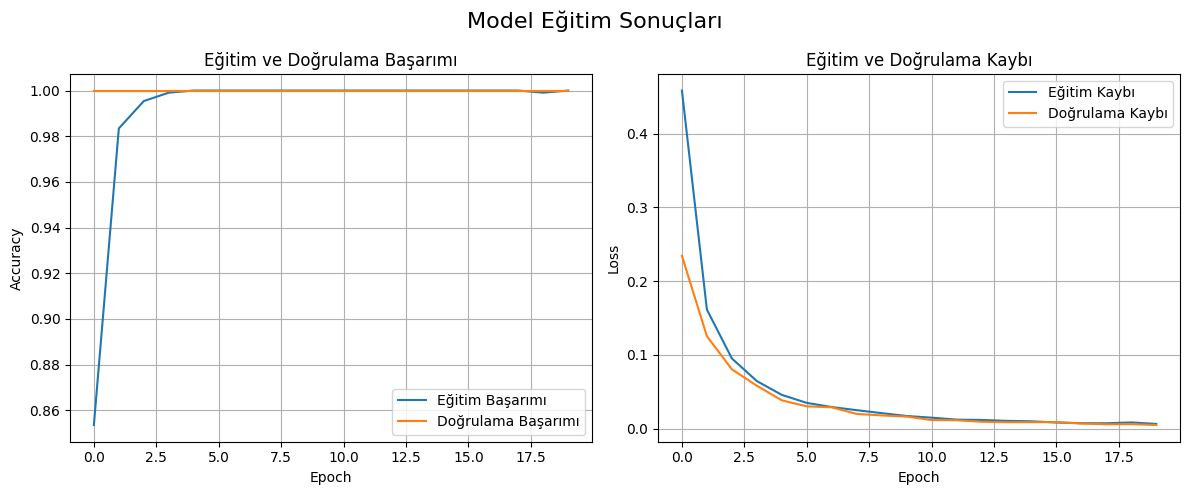

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

from google.colab import drive
drive.mount('/content/drive')

# --- Veri Yolları ---
train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Test"

# --- Parametreler ---
IMG_SIZE = (512, 512)
BATCH_SIZE = 16
EPOCHS = 20

# --- Veri Setlerini Yükleme ---
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- MODEL OLUŞTURMA ---
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti ---")
model.summary()

# --- EĞİTİM ---
print(f"\n--- Eğitim Başladı ({EPOCHS} Epoch) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

# --- TEST ---
print("\nModel test verisi üzerinde değerlendiriliyor...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Kaybı: {test_loss:.4f}")
print(f"Test Başarımı: {test_accuracy:.4f}")

# --- GRAFİK ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Model Eğitim Sonuçları', fontsize=16)
plt.tight_layout()
plt.show()


# MobileNet odel

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri setleri yükleniyor...
Found 1634 files belonging to 4 classes.
Using 1308 files for training.
Found 1634 files belonging to 4 classes.
Using 326 files for validation.
Found 362 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']


/tmp/ipython-input-5-4061740220.py:69: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Model Özeti ---


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 16, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Eğitim Başladı (25 Epoch) ---
Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.5197 - loss: 1.1188 - val_accuracy: 0.7362 - val_loss: 0.7373
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.8453 - loss: 0.5323 - val_accuracy: 0.8865 - val_loss: 0.5018
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9188 - loss: 0.3873 - val_accuracy: 0.9571 - val_loss: 0.4162
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9457 - loss: 0.3072 - val_accuracy: 0.8742 - val_loss: 0.3712
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9650 - loss: 0.2252 - val_accuracy: 0.9202 - val_loss: 0.3290
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9827 - loss: 0.1956 - val_accuracy: 0.8834 - val_loss: 0.3197
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9567 - loss: 0.1921 - val_accuracy: 0.8865 - val_loss: 0.2928
Epoch 8/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9740 - lo

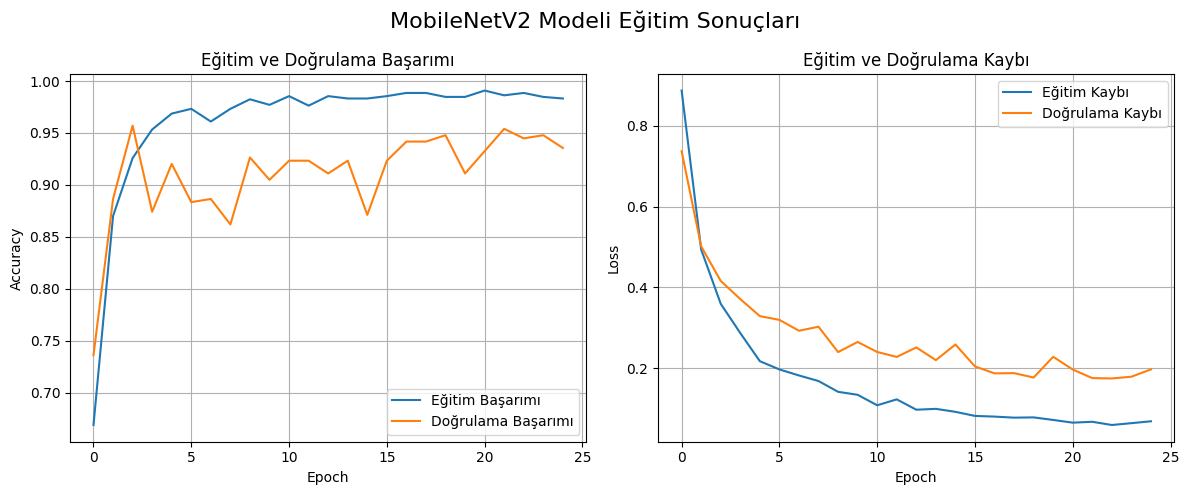

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2

from google.colab import drive
drive.mount('/content/drive')

# --- Veri Yolları ---
train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_/Test"

# --- Parametreler ---
IMG_SIZE = (512, 512)
BATCH_SIZE = 16
EPOCHS = 25

# --- Veri Setlerini Yükleme ---
print("Veri setleri yükleniyor...")
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

# Performans için optimize et
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# --- MODEL OLUŞTURMA ---

# Veri artırma katmanı
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

# MobileNetV2 modeli (önceden eğitilmiş, top katmanı çıkarılmış)
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)
base_model.trainable = False  # Fine-tuning yok

# Tam model
inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

# Derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti ---")
model.summary()

# --- MODEL EĞİTİMİ ---
print(f"\n--- Eğitim Başladı ({EPOCHS} Epoch) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

# --- TEST ---
print("\nModel test verisi üzerinde değerlendiriliyor...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Kaybı: {test_loss:.4f}")
print(f"Test Başarımı: {test_accuracy:.4f}")

# --- GRAFİK ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('MobileNetV2 Modeli Eğitim Sonuçları', fontsize=16)
plt.tight_layout()
plt.show()
